In [22]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## 1. Use the titanic data set, perform preprocessing by deal with missing values, drop irrelevant attributes.

In [31]:
# Load datset
df = pd.read_csv("titanic_dataset.csv")
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [32]:
# Drop as ID, Embarked, Name, and Ticket are irrelevant
df = df.drop(["PassengerId", "Ticket", "Embarked", "Name"], axis=1)
# Replace missing age values with mean age
df["Age"] = df["Age"].fillna(value=df["Age"].mean())
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin
0,0,3,male,22.000000,1,0,7.2500,NaN
1,1,1,female,38.000000,1,0,71.2833,C85
2,1,3,female,26.000000,0,0,7.9250,NaN
3,1,1,female,35.000000,1,0,53.1000,C123
4,0,3,male,35.000000,0,0,8.0500,NaN
...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,NaN
887,1,1,female,19.000000,0,0,30.0000,B42
888,0,3,female,29.699118,1,2,23.4500,NaN
889,1,1,male,26.000000,0,0,30.0000,C148


In [33]:
# We can see that most of the values in the Cabin column are NAN and the entire column is hence being dropped
print(df["Cabin"].isna().value_counts())
df = df.drop("Cabin", axis=1)

True     687
False    204
Name: Cabin, dtype: int64


In [34]:
# We can see that there isn't too much of a difference after preprocessing and hence we can continue
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [86]:
vals = df['Survived'].value_counts()
vals
# The data is slightly imbalanced

0    549
1    342
Name: Survived, dtype: int64

## 2. Use the scikit learn pipelines to perform the preprocessing - standardizing, encoding and model fitting in one step. 

In [53]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

In [56]:
X_train, X_test, y_train, y_test = train_test_split(df.drop("Survived", axis=1), df["Survived"], test_size=0.2)
pipe = Pipeline([('encoder', OrdinalEncoder(handle_unknown=True)), ('scaler', StandardScaler(with_mean=False)), ('gnb', GaussianNB())])
pipe.fit(X_train.values, y_train.values)

Pipeline(steps=[('encoder', OrdinalEncoder(handle_unknown=True)),
                ('scaler', StandardScaler(with_mean=False)),
                ('gnb', GaussianNB())])

In [57]:
pipe.score(X_test, y_test)

0.6368715083798883

## 3. Perform Bayes classification using cross validation.

In [58]:
from sklearn.model_selection import cross_val_score

In [64]:
scores = cross_val_score(pipe, df.drop("Survived", axis = 1), df["Survived"], cv = 50)
scores

array([0.66666667, 0.44444444, 0.66666667, 0.72222222, 0.61111111,
       0.55555556, 0.55555556, 0.55555556, 0.55555556, 0.72222222,
       0.5       , 0.72222222, 0.83333333, 0.77777778, 0.55555556,
       0.61111111, 0.83333333, 0.61111111, 0.61111111, 0.61111111,
       0.66666667, 0.66666667, 0.77777778, 0.77777778, 0.61111111,
       0.72222222, 0.61111111, 0.77777778, 0.72222222, 0.77777778,
       0.55555556, 0.66666667, 0.77777778, 0.88888889, 0.77777778,
       0.77777778, 0.72222222, 0.77777778, 0.66666667, 0.77777778,
       0.77777778, 0.64705882, 0.88235294, 0.64705882, 0.64705882,
       0.70588235, 0.70588235, 0.88235294, 0.64705882, 0.88235294])

## 4. Tabulate using relevant measures of accuracy , Sensitivity and specificity.

In [77]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_validate
from sklearn.metrics import confusion_matrix

In [79]:
y_preds = pipe.predict(X_test)
conf_mat = confusion_matrix(y_test, y_preds)
conf_mat

array([[92, 31],
       [34, 22]], dtype=int64)

In [80]:
acc_rate = round((conf_mat[0][0] + conf_mat[1][1])/(conf_mat[0][0] + conf_mat[1][1] + conf_mat[0][1] + conf_mat[1][0]), 3)
acc_rate
# The classifier has anaccuracy of 0.637 which means it has a fairly decent classifying performance. 

0.637

In [81]:
true_pos = round(conf_mat[0][0]/(conf_mat[0][0] + conf_mat[0][1]), 3)
true_pos
# The true positive rate is 0.748 which indicates that the classifier is good at predicting correctly when people will
# survive

0.748

In [83]:
true_neg = round(conf_mat[1][1]/(conf_mat[1][0] + conf_mat[1][1]), 3)
true_neg
# The true negative rate is 0.393 which indicates that the classifier is not very good at predicting when people
# will not survive

0.393

## 5. Visualize the ROC curve and comment on performance

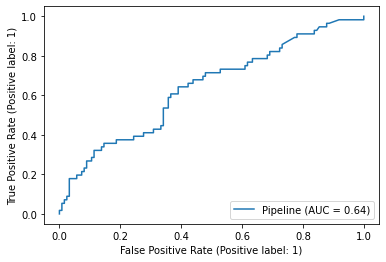

In [75]:
from sklearn import metrics

metrics.plot_roc_curve(pipe, X_test, y_test) 

In [76]:
# The AUC score is 0.64 which is quite poor. 
# An AUC of 0.64 indicates that it has a decent area under the curve and is decently good at correctly classifying
# observations into categories.